<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Classes" data-toc-modified-id="Classes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Classes</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Environment" data-toc-modified-id="Environment-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Environment</a></span></li></ul></li><li><span><a href="#Main" data-toc-modified-id="Main-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Main</a></span><ul class="toc-item"><li><span><a href="#Population-Synthesis" data-toc-modified-id="Population-Synthesis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Population Synthesis</a></span></li></ul></li><li><span><a href="#Measure" data-toc-modified-id="Measure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Measure</a></span></li></ul></div>

# Preamble

## Imports

In [2]:
import sys
sys.path.append('../')
sys.path.append('../model/')
from simulation_run import SimulationRun

import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context('notebook')

## Classes

## Functions

In [2]:
def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

## Environment

In [3]:
num_people = 100

In [4]:
mean_connections = 5

In [5]:
num_days = 20

In [6]:
days = []

In [7]:
initial_states = {
    'inf': 0.1,
}

In [8]:
pathogen = {
 'infection_rate': 0.4,
 'recovery_rate': 0.1,
 'death_rate': 0.01,
 'spontaneous_rate': 0.0,
 'testing_accuracy': None,
 'immunity_period': 10**2,
 'contagious_period': 99,
 'incubation_period': 0
}

# Main

## Population Synthesis

In [9]:
sim = SimulationRun(
    num_people=num_people,
    mean_connections=mean_connections,
    initial_states=initial_states,
    pathogen=pathogen,
    num_days=num_days,
)

+ Synthesizing population.


In [10]:
%%time 
sim.run()


+ Day 0
+ PopulationEngine loaded.

+ Day 1
+ PopulationEngine loaded.

+ Day 2
+ PopulationEngine loaded.

+ Day 3
+ PopulationEngine loaded.

+ Day 4
+ PopulationEngine loaded.

+ Day 5
+ PopulationEngine loaded.

+ Day 6
+ PopulationEngine loaded.

+ Day 7
+ PopulationEngine loaded.

+ Day 8
+ PopulationEngine loaded.

+ Day 9
+ PopulationEngine loaded.

+ Day 10
+ PopulationEngine loaded.

+ Day 11
+ PopulationEngine loaded.

+ Day 12
+ PopulationEngine loaded.

+ Day 13
+ PopulationEngine loaded.

+ Day 14
+ PopulationEngine loaded.

+ Day 15
+ PopulationEngine loaded.

+ Day 16
+ PopulationEngine loaded.

+ Day 17
+ PopulationEngine loaded.

+ Day 18
+ PopulationEngine loaded.

+ Day 19
+ PopulationEngine loaded.
CPU times: user 1min 13s, sys: 703 ms, total: 1min 14s
Wall time: 1min 16s


# Measure

In [13]:
days = sim.days

In [14]:
measurements = []

In [15]:
for i,day in enumerate(days):
    try:
        inf = day.starting_population.state.value_counts()['inf']
    except:
        inf = 0
    try:
        sus = day.starting_population.state.value_counts()['sus']
    except:
        sus = 0
    try:
        dead = day.starting_population.state.value_counts()['dead']
    except:
        dead = 0
        
    imm = sum(day.starting_population.immunity > 0)

    measure = {
        'day': i,
        'inf': inf,
        'sus': sus,
        'dead': dead,
        'imm': imm
    }

    measurements.append(measure)

In [16]:
data = pd.DataFrame(measurements)
data['sus_minus_imm'] = data.sus - data.imm
data['total_people'] = data.inf + data.sus

In [22]:
sns.set()
sns.set_context('notebook')

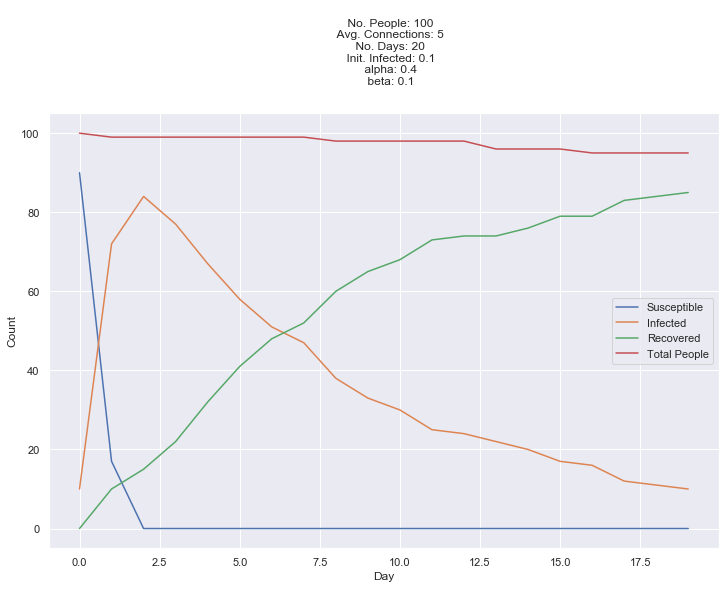

In [29]:
title = (
    '''
    No. People: {np}
    Avg. Connections: {ac}
    No. Days: {nd}
    Init. Infected: {ii}
    alpha: {ir}
    beta: {rr}
    
    '''
    .format(
        np=num_people,
        ac=mean_connections,
        ir=pathogen['infection_rate'],
        rr=pathogen['recovery_rate'],
        nd=num_days,
        ii=initial_states['inf']
    )
)
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
sns.lineplot(x='day',y='sus_minus_imm',data=data,ax=ax,label='Susceptible')
sns.lineplot(x='day',y='inf',data=data,ax=ax,label='Infected')
sns.lineplot(x='day',y='imm',data=data,ax=ax,label='Recovered')
sns.lineplot(x='day',y='total_people',data=data,ax=ax,label='Total People')
_ = ax.set(xlabel='Day',ylabel='Count',title=title)

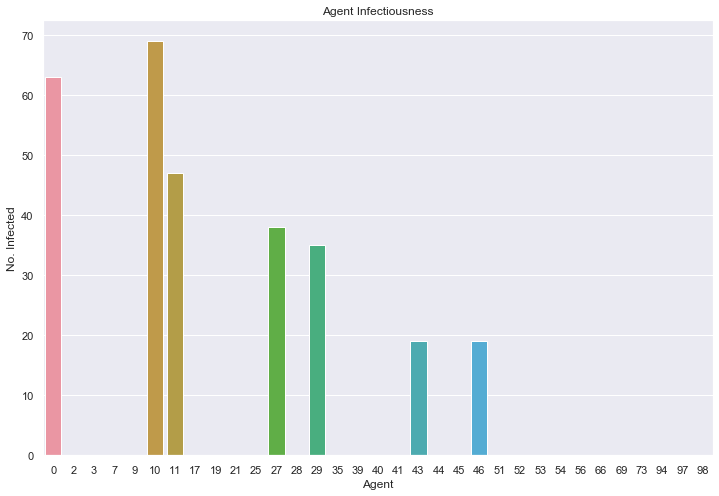

In [28]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
sns.set(context='notebook')
sns.barplot(x='index',y='infected_by',data=df.reset_index(),ax=ax)
_ = ax.set(
    title='Agent Infectiousness',
    xlabel='Agent',
    ylabel='No. Infected'
)
